<a href="https://colab.research.google.com/github/MahdiNavaei/Cat_Dog_Classifier/blob/main/Cat_and_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import imghdr
import numpy as np

%matplotlib inline

In [2]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Projects/Cat and Dog Classification/data')

Found 1152 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

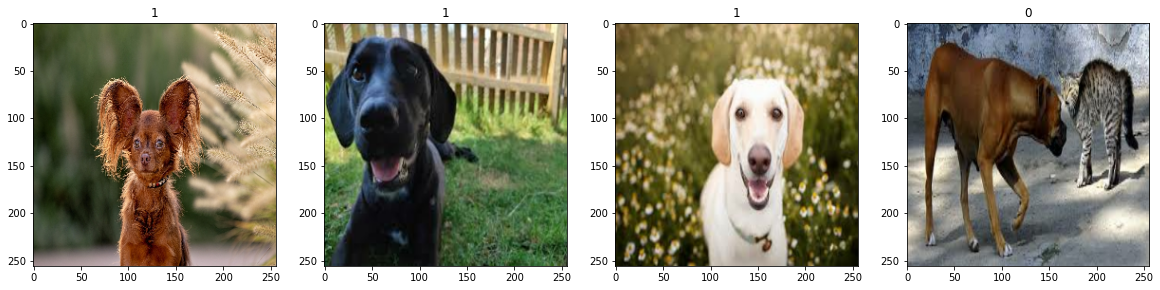

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Dog = 1

Cat= 0

# Scale Data


In [6]:
data = data.map(lambda x,y: (x/255, y))

In [7]:
data.as_numpy_iterator().next()

(array([[[[0.9882353 , 1.        , 0.98039216],
          [0.9882353 , 1.        , 0.98039216],
          [0.9882353 , 1.        , 0.98039216],
          ...,
          [0.53811276, 0.57101715, 0.17245711],
          [0.5550245 , 0.58639705, 0.18247549],
          [0.57570463, 0.6070772 , 0.20315564]],
 
         [[0.9882353 , 1.        , 0.98039216],
          [0.9882353 , 1.        , 0.98039216],
          [0.9882353 , 1.        , 0.98039216],
          ...,
          [0.5224035 , 0.5548696 , 0.16484794],
          [0.5393153 , 0.57068783, 0.17574295],
          [0.5578389 , 0.58921146, 0.19426659]],
 
         [[0.9882353 , 1.        , 0.9815181 ],
          [0.9882353 , 1.        , 0.9815181 ],
          [0.9882353 , 1.        , 0.9815181 ],
          ...,
          [0.49984238, 0.532667  , 0.15600269],
          [0.5163143 , 0.5488128 , 0.16733302],
          [0.5321442 , 0.5646426 , 0.18316285]],
 
         ...,
 
         [[0.73135155, 0.73135155, 0.699979  ],
          [0.72122

#  Split Data

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [9]:
train_size

25

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#  Build Deep Learning Model

In [11]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(128, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(256, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(512, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0

#  Train

In [17]:
logdir='logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")


Epoch 1/50
25/25 [==============================] - 63s 2s/step - loss: 0.7110 - accuracy: 0.5163 - val_loss: 0.6813 - val_accuracy: 0.6161
Epoch 2/50
25/25 [==============================] - 16s 617ms/step - loss: 0.6646 - accuracy: 0.6100 - val_loss: 0.6150 - val_accuracy: 0.7098
Epoch 3/50
25/25 [==============================] - 16s 611ms/step - loss: 0.5593 - accuracy: 0.7125 - val_loss: 0.6043 - val_accuracy: 0.6696
Epoch 4/50
25/25 [==============================] - 16s 615ms/step - loss: 0.5057 - accuracy: 0.7588 - val_loss: 0.5503 - val_accuracy: 0.7277
Epoch 5/50
25/25 [==============================] - 16s 623ms/step - loss: 0.4133 - accuracy: 0.8263 - val_loss: 0.4628 - val_accuracy: 0.7857
Epoch 6/50
25/25 [==============================] - 16s 625ms/step - loss: 0.3292 - accuracy: 0.8725 - val_loss: 0.5038 - val_accuracy: 0.7768
Epoch 7/50
25/25 [==============================] - 16s 618ms/step - loss: 0.3003 - accuracy: 0.8888 - val_loss: 0.4541 - val_accuracy: 0.8170
Ep

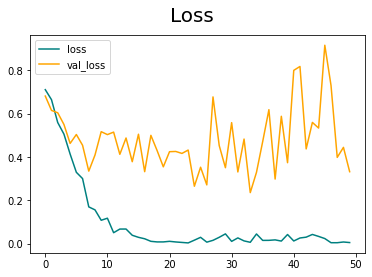

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

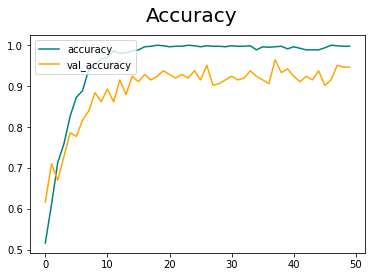

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 27ms/step


In [25]:
print(f"Precision: {pre.result().numpy()} , Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}")

Precision: 0.957446813583374 , Recall: 0.9375, BinaryAccuracy: 0.9479166865348816


# Test

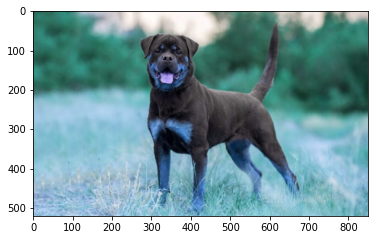

In [64]:
img = cv2.imread('/content/drive/MyDrive/Projects/Cat and Dog Classification/data/dog_test2.jpg')
plt.imshow(img)
plt.show()

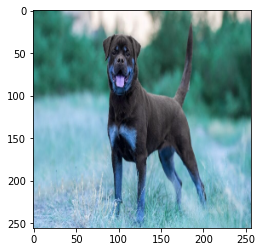

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [67]:
yhat

array([[0.9999933]], dtype=float32)

In [68]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


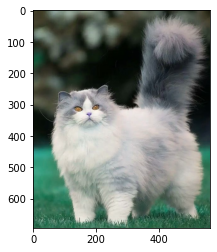

In [71]:
img1 = cv2.imread('/content/drive/MyDrive/Projects/Cat and Dog Classification/data/cat_test.jpg')
plt.imshow(img1)
plt.show()

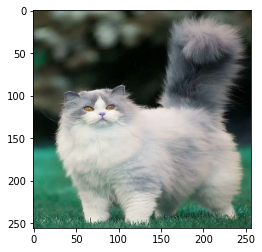

In [72]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat1 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [74]:
yhat1

array([[0.3245431]], dtype=float32)

In [75]:
if yhat1 > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


# Save Model

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save(os.path.join('models','Cat_Dog_calassifier.h5'))

In [81]:
new_model = load_model('/content/models/Cat_Dog_calassifier.h5')

In [85]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


array([[0.3245431]], dtype=float32)